In [1]:
#NLTK - Natural Language Toolkit

In [2]:
!pip install nltk

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import nltk

import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

import sys 
from nltk.stem import SnowballStemmer
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS
import os
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

''''# NLP Projesi icin yapmamiz gerekenler
1-Herseyi kucuk harfe cevir
2-Noktalama isaretlerini kaldir
3-Rakamlari kaldir
4-satir sonlari \n kaldir
5- Gereksiz kelimeleri cikar Stopword
6-Tokenize islemi
7-Lemma ve Stemma
8 - Vectorizer rakama ceviriyor'''

In [4]:
df=pd.read_csv("restaurant.csv")

In [5]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [6]:
df.shape

(10417, 10)

df.stars.value_counts()

<AxesSubplot:xlabel='stars', ylabel='count'>

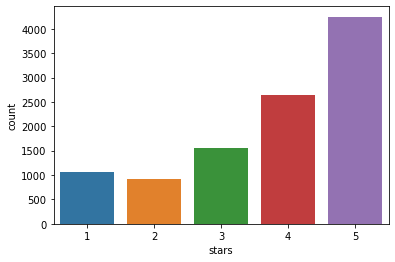

In [7]:
sns.countplot(x=df['stars'])

In [8]:
df["year"]= pd.DatetimeIndex(df["date"]).year

In [9]:
df2=pd.DataFrame(df.groupby("year").stars.mean())#yıldızları yıllara göre grupladık

/Users/bmaho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


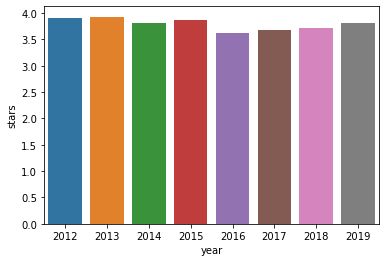

In [10]:
sns.barplot(df2.index,df2.stars); #grafik üzerinde yıldızların yıllara göre değişimini gördük

In [11]:
df["month"]=pd.DatetimeIndex(df["date"]).month
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,2012,12
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,2014,1
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,2015,6
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,2016,12
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36,2019,11
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07,2019,11
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22,2019,12
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51,2019,11


In [12]:
df.loc[df['stars']==3,'sentiment']='neutral'
df.loc[df['stars']<3,'sentiment']='negative'
df.loc[df['stars']>3,'sentiment']='positive'
df=df[["stars","sentiment","text"]]
df.head(5) #negatif pozitif ve nötr yorumları belirledim

,stars,sentiment,text
0,5,positive,After getting food poisoning at the Palms hote...
1,4,positive,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,4,positive,The crab legs are better than the ones at Wick...
3,1,negative,Not worth it! Too salty food and expensive! Th...
4,5,positive,I would give this infinite stars if I could. M...


In [13]:
df['text']=df['text'].str.lower() #Butun sutunu kucuk harfe cevirir
df['text']=df['text'].str.replace('[^\w\s]','') # Noktalama isaretlerini kaldirir
df['text']=df['text'].str.replace('\d+','') # Rakamlari kaldirir
df['text']=df['text'].str.replace('\n','') # yeni satirlari kaldir
df['text']=df['text'].str.replace('\r','') #Enter i kaldir

/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_23252/4166630195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']=df['text'].str.lower() #Butun sutunu kucuk harfe cevirir
/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_23252/4166630195.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('[^\w\s]','') # Noktalama isaretlerini kaldirir
/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_23252/4166630195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [14]:
df.head()

,stars,sentiment,text
0,5,positive,after getting food poisoning at the palms hote...
1,4,positive,a feast worthy of godsbaccarnal buffet in caes...
2,4,positive,the crab legs are better than the ones at wick...
3,1,negative,not worth it too salty food and expensive this...
4,5,positive,i would give this infinite stars if i could my...


([<matplotlib.patches.Wedge at 0x11c0ecfa0>,
 [Text(-0.5321893333270193, 0.9626912867025145, 'Positive'),
  Text(0.03764542973995102, -1.099355639281345, 'Negative'),
  Text(0.9803405607016918, -0.4989312428011425, 'Neutral')],
 [Text(-0.2902850909056469, 0.5251043382013715, '66.1%'),
  Text(0.020533870767246006, -0.5996485305170972, '18.9%'),
  Text(0.5347312149281955, -0.2721443142551686, '15.0%')])

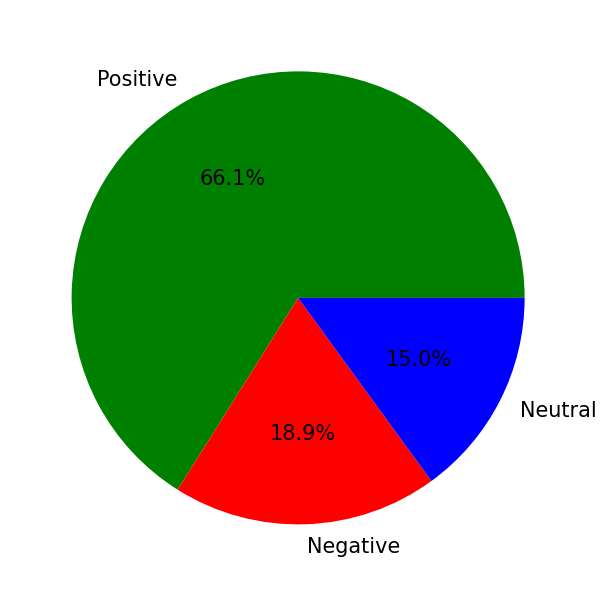

In [15]:
pie_sentiment=df.sentiment.value_counts(normalize=True)
plt.figure(figsize=(5,5),dpi=150)
labels='Positive','Negative','Neutral'
colors=['green','red','blue']
plt.pie(pie_sentiment,colors=colors,labels=labels,autopct='%1.1f%%')

In [16]:
df['language']=df['text'].apply(detect) #textdeki dilleri bul

/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_23252/2589017607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language']=df['text'].apply(detect) #textdeki dilleri bul


In [17]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [18]:
from textblob import TextBlob

In [19]:
#burada ingilizce olmayan yorumları çevirmeyi denedim 
#sonra ingilizce olamayanları kaldırarak devam etmeye karra verdim  

In [20]:
#TextBlob==df['language']=df['text']
#TextBlob.translate(from_lang="ja",to='en')

In [21]:
df=df[df["language"]=="en"]#ingilizce olan yorumları aldık

In [22]:
df.sentiment.value_counts()

positive    6852
negative    1964
neutral     1557
Name: sentiment, dtype: int64

In [23]:
df.sentiment.value_counts(normalize=True)

positive    0.660561
negative    0.189338
neutral     0.150101
Name: sentiment, dtype: float64

In [24]:
df[['polarity','subjectivity']]=df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [25]:
df# pozitiflik ve öznellik durumlarına baktık

,stars,sentiment,text,language,polarity,subjectivity
0,5,positive,after getting food poisoning at the palms hote...,en,0.337330,0.586926
1,4,positive,a feast worthy of godsbaccarnal buffet in caes...,en,0.219409,0.537292
2,4,positive,the crab legs are better than the ones at wick...,en,-0.134722,0.731944
3,1,negative,not worth it too salty food and expensive this...,en,-0.325000,0.400000
4,5,positive,i would give this infinite stars if i could my...,en,0.362500,0.725000
...,...,...,...,...,...,...
10412,5,positive,best buffet ever irma was great served us bett...,en,0.543750,0.481250
10413,4,positive,hollllllyyyy moleyyyy this buffet was one for ...,en,0.210101,0.586869
10414,5,positive,the selection is amazing and all the food is e...,en,0.480000,0.630000
10415,4,positive,one of the best buffets ive had in vegas my on...,en,0.185185,0.533333


In [26]:
stars1= df.query('stars<3')['text']
stars1 #df içinde 3 yıldızdan küçük olanları 1 yıldız olarak hesapla göster 

3        not worth it too salty food and expensive this...
12       food is fine better than most buffets when i r...
29       so i come here on my birthday thinking its the...
33       be careful using the restroom here while i was...
42       what a money pit food was terrible and not lab...
                               ...                        
10390    i  have eaten here for the breakfast and lunch...
10394    in thanksgiving day i stayed in line for three...
10401    i went to the wicked spoon at cosmopolitan and...
10402    i am one disappointed buffetloving foodie we f...
10410    came him from la thanksgiving week we decided ...
Name: text, Length: 1964, dtype: object

In [27]:
def wc(df,bgcolor):      
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor,max_words=100,stopwords=STOPWORDS, mask=mask,random_state=42)
    wc.generate(' '.join(stars1))
    wc.to_file("cloud2.png")
    plt.imshow(wc)
    plt.axis('off')
    plt.title('stars1 Review')

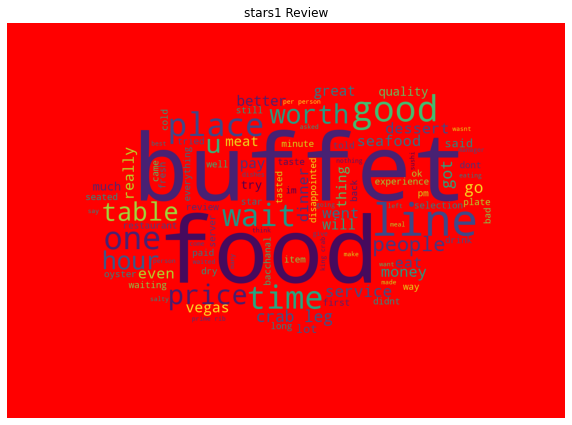

In [28]:
wc(stars1,'red') 

In [29]:
stars5= df.query('stars>3')['text']
stars5 #df içinde 3 yıldız üstünü 5 yıldız olarak hesapla göster 

0        after getting food poisoning at the palms hote...
1        a feast worthy of godsbaccarnal buffet in caes...
2        the crab legs are better than the ones at wick...
4        i would give this infinite stars if i could my...
5        really enjoyed everything they had to offer it...
                               ...                        
10412    best buffet ever irma was great served us bett...
10413    hollllllyyyy moleyyyy this buffet was one for ...
10414    the selection is amazing and all the food is e...
10415    one of the best buffets ive had in vegas my on...
10416    i got a chance to go to the bacchanal buffett ...
Name: text, Length: 6852, dtype: object

In [30]:
def wc(df,bgcolor):      
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor,max_words=100,stopwords=STOPWORDS, mask=mask,random_state=42)
    wc.generate(' '.join(stars5))
    wc.to_file("cloud2.png")
    plt.imshow(wc)
    plt.axis('off')
    plt.title('stars5 Review')

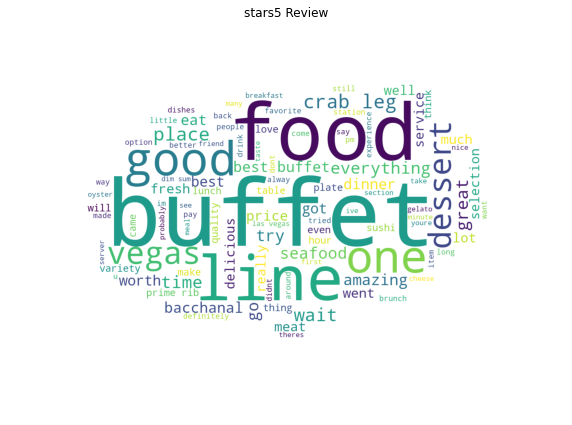

In [31]:
wc(stars5,'white') 

In [32]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/bmaho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
from nltk.tokenize import sent_tokenize
# Cumleleri ayirmak icin

In [34]:
from nltk.tokenize import word_tokenize

In [35]:
from nltk.tokenize import TreebankWordTokenizer

In [36]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/bmaho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
nltk.corpus.stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
x=df.text
y=df.sentiment

In [39]:
text= df.text

In [40]:
from nltk.tokenize import word_tokenize

In [41]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bmaho/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we atethe seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it thoughthe prime rib was the best ive ever hadi loved the sweet potato totsi even have phothe music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightfuli will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinner',
  'NN'),
 ('a feast worthy of godsbaccarnal buffet in caesar palace is consider the best buffet in

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [43]:
vect=CountVectorizer()

In [44]:
#tf=Term Frequency
#IDF=Inverse document frequency
tf=pd.DataFrame(vect.fit_transform(df).toarray(),columns=vect.get_feature_names())

/Users/bmaho/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
tf # term frequency 

,language,polarity,sentiment,stars,subjectivity,text
0,0,0,0,1,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,1,0,0,0,0
5,0,0,0,0,1,0


In [46]:
df2=vect.fit_transform(df).toarray().sum(axis=0)

In [47]:
df

,stars,sentiment,text,language,polarity,subjectivity
0,5,positive,after getting food poisoning at the palms hote...,en,0.337330,0.586926
1,4,positive,a feast worthy of godsbaccarnal buffet in caes...,en,0.219409,0.537292
2,4,positive,the crab legs are better than the ones at wick...,en,-0.134722,0.731944
3,1,negative,not worth it too salty food and expensive this...,en,-0.325000,0.400000
4,5,positive,i would give this infinite stars if i could my...,en,0.362500,0.725000
...,...,...,...,...,...,...
10412,5,positive,best buffet ever irma was great served us bett...,en,0.543750,0.481250
10413,4,positive,hollllllyyyy moleyyyy this buffet was one for ...,en,0.210101,0.586869
10414,5,positive,the selection is amazing and all the food is e...,en,0.480000,0.630000
10415,4,positive,one of the best buffets ive had in vegas my on...,en,0.185185,0.533333


In [48]:
tf/df

TypeError: unsupported operand type(s) for /: 'float' and 'str'

In [ ]:
star=df[(df.stars==1)|(df.stars==5)]

In [ ]:
star.reset_index(drop=True,inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
x=star["text"]
y=star["stars"]

In [ ]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,1))

In [ ]:
x=vect.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42, test_size=.20)

In [ ]:
x_train

In [ ]:
tf=pd.DataFrame(x_train.toarray(),columns=vect.get_feature_names())

In [ ]:
tf.head()

In [ ]:
l=LogisticRegression()

In [ ]:
l.fit(x_train,y_train)

In [ ]:
pred=l.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(pred,y_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
m=MultinomialNB()

In [ ]:
pred2=m.fit(x_train,y_train).predict(x_test)

In [ ]:
accuracy_score(pred2,y_test)

In [ ]:
# MultinomialNB de 0.93 çıktı
# Lojistik Regresyonda 0.94 çıktı